Loading listings IDs from: ./listings.csv
Loading calendar IDs from: ./calendar.csv
Loading reviews IDs from: ./reviews.csv

Extracting unique valid IDs...
Unique valid IDs in Listings: 19994
Unique valid IDs in Calendar: 95142
Unique valid IDs in Reviews: 52786

--- Intersection Counts ---
listings  calendar  reviews
False     False     True           1
          True      False      33428
                    True       41720
True      True      False       8929
                    True       11065
dtype: int64

Generating UpSet plot...


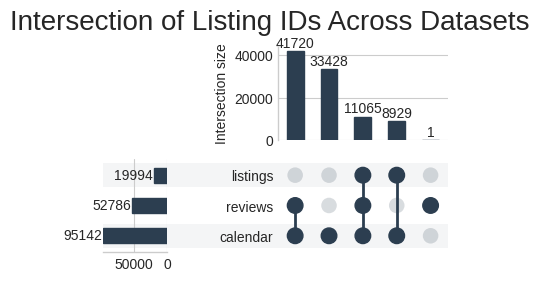

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


LISTINGS_PATH = './listings.csv'
CALENDAR_PATH = './calendar.csv'
REVIEWS_PATH = './reviews.csv'
LISTINGS_ID_COL = 'id'
CALENDAR_ID_COL = 'listing_id'
REVIEWS_ID_COL = 'listing_id'


print(f"Loading listings IDs from: {LISTINGS_PATH}")
df_listings = pd.read_csv(LISTINGS_PATH, usecols=[LISTINGS_ID_COL], low_memory=False)

print(f"Loading calendar IDs from: {CALENDAR_PATH}")
df_calendar = pd.read_csv(CALENDAR_PATH, usecols=[CALENDAR_ID_COL])

print(f"Loading reviews IDs from: {REVIEWS_PATH}")
df_reviews = pd.read_csv(REVIEWS_PATH, usecols=[REVIEWS_ID_COL])


print("\nExtracting unique valid IDs...")


def get_valid_ids(df, id_col):
    if id_col not in df.columns:
        print(f"Warning: ID column '{id_col}' not found.")
        return set()
    return set(pd.to_numeric(df[id_col], errors='coerce').dropna().astype(int).unique())

listings_ids_set = get_valid_ids(df_listings, LISTINGS_ID_COL)
calendar_ids_set = get_valid_ids(df_calendar, CALENDAR_ID_COL)
reviews_ids_set = get_valid_ids(df_reviews, REVIEWS_ID_COL)

print(f"Unique valid IDs in Listings: {len(listings_ids_set)}")
print(f"Unique valid IDs in Calendar: {len(calendar_ids_set)}")
print(f"Unique valid IDs in Reviews: {len(reviews_ids_set)}")





all_unique_ids = list(listings_ids_set.union(calendar_ids_set).union(reviews_ids_set))

upset_data = pd.DataFrame(index=all_unique_ids)
upset_data['listings'] = upset_data.index.isin(listings_ids_set)
upset_data['calendar'] = upset_data.index.isin(calendar_ids_set)
upset_data['reviews'] = upset_data.index.isin(reviews_ids_set)





upset_summary = upset_data.groupby(['listings', 'calendar', 'reviews']).size()

print("\n--- Intersection Counts ---")
print(upset_summary)


print("\nGenerating UpSet plot...")

try:
    from upsetplot import UpSet


    plt.style.use('seaborn-v0_8-whitegrid')


    upset = UpSet(upset_summary,
                  sort_by='cardinality',
                  show_counts=True,
                  facecolor="
                  intersection_plot_elements=3
                 )





    fig = plt.figure(figsize=(20, 10))
    upset.plot(fig=fig)
    plt.suptitle("Intersection of Listing IDs Across Datasets", fontsize=20, y=1.02)
    plt.savefig("upset_plot_styled.png", dpi=600, bbox_inches='tight')
    plt.show()

except ImportError:
    print("\nSkipping UpSet plot: library 'upsetplot' not installed.")
    print("Install using: pip install upsetplot")
except Exception as e:
    print(f"\nAn error occurred during UpSet plotting: {e}")

finally:

    plt.style.use('default')







